Homework 4 - Multi-Class Classification 

Nishchay Patel

Importing the libraries needed

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


1. Data Exploration

In [15]:
data = pd.read_csv('performance.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
print(data.sample(5))

     Adm_Year  Gender   Age  HSC_Pass_Year Program Merit_Scholarship  \
705    2020.0  Female  22.0         2019.0    BCSE               Yes   
509    2022.0    Male  21.0         2020.0    BCSE               Yes   
852    2020.0    Male  21.0         2018.0    BCSE                No   
807    2021.0    Male  21.0         2020.0    BCSE                No   
156    2021.0    Male  20.0         2019.0    BCSE                No   

    Uni_Transport Learn_Mode Smartphone   PC  ... SM_Hours1 Avg_Attendance1  \
705            No    Offline        Yes  Yes  ...       4.0           100.0   
509            No    Offline        Yes  Yes  ...       3.0            90.0   
852            No     Online        Yes   No  ...       7.0           100.0   
807            No    Offline        Yes  Yes  ...       3.0           100.0   
156            No    Offline        Yes  Yes  ...       3.0           100.0   

                             Skills1 Skill_Dev_Hours1  \
705                      Programmin

In [17]:
data.isnull().sum()

Adm_Year                                                                      0
Gender                                                                        0
Age                                                                           0
HSC_Pass_Year                                                                 0
Program                                                                       0
Merit_Scholarship                                                             0
Uni_Transport                                                                 0
Learn_Mode                                                                    0
Smartphone                                                                    0
PC                                                                            0
Eng_Proficiency                                                               0
Probation                                                                     0
Suspension                              

In [18]:
print(data.nunique())

Adm_Year                                                                       12
Gender                                                                          2
Age                                                                            10
HSC_Pass_Year                                                                  12
Program                                                                         1
Merit_Scholarship                                                               2
Uni_Transport                                                                   2
Learn_Mode                                                                      2
Smartphone                                                                      2
PC                                                                              2
Eng_Proficiency                                                                 3
Probation                                                                       2
Suspension      

Label Distribution:
Target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64


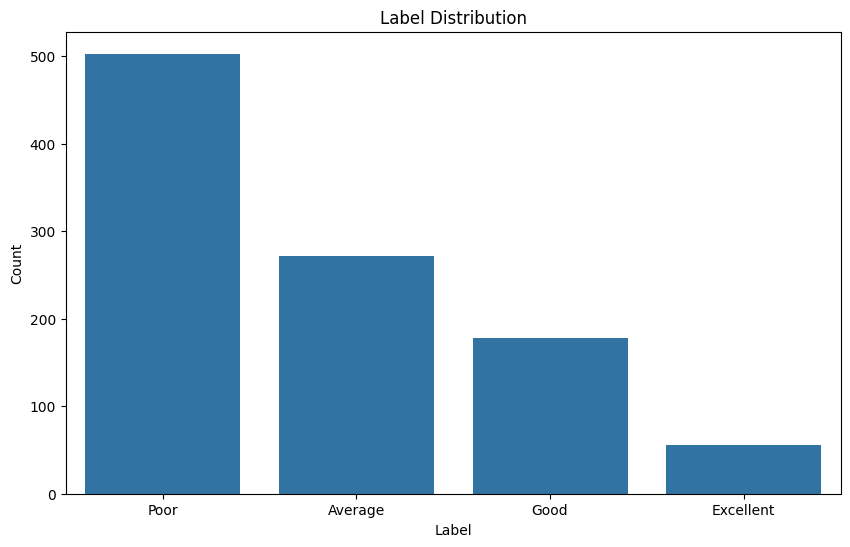

In [19]:

getting_count = data["Target"]

label_counts = getting_count.value_counts()
print("Label Distribution:")
print(label_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

2. Data Preprocessing

In [20]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Target'])

X = data.drop('Target', axis=1)

categorical_columns_nominal = ['Gender', 'Merit_Scholarship', 'Uni_Transport', 'Learn_Mode', 'Smartphone', 'PC', 'Program', 'Skills1', 'Interest_Area1']
categorical_columns_ordinal = ['Eng_Proficiency', 'Relationship']

numerical_columns = ['Age', 'Adm_Year', 'HSC_Pass_Year', 'Curr_Sem1', 'Study_Hours1', 
                     'Study_Sessions1', 'SM_Hours1', 'Avg_Attendance1', 'Skill_Dev_Hours1', 
                     'Prev_SGPA1', 'Curr_CGPA1', 'Completed_Credits1', 'Family_Income1']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_nominal', OneHotEncoder(drop='first'), categorical_columns_nominal),
        ('num', StandardScaler(), numerical_columns)
    ])

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [21]:
X_train_dense = X_train.toarray()

X_train_df = pd.DataFrame(X_train_dense)

X_train_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
308,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.146212,1.987564,-0.064700,-1.000469,-0.504694,-0.152709,0.353921,-0.179593,-0.858025,-0.719305
35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.119970,-0.636829,-1.031837,0.640117,-0.131354,0.526073,-0.905426,-0.439392,1.426600,2.984759
656,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.119970,-0.636829,0.902438,-1.000469,0.739774,1.204855,-0.229110,0.613476,1.384681,0.284011


In [22]:
X_test_dense = X_test.toarray()

X_test_df = pd.DataFrame(X_test_dense)

X_test_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
173,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.149961,0.317496,-1.031837,-0.795395,-0.504694,-0.152709,0.062406,-0.548781,-0.878985,-0.296524
24,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.138715,-0.636829,-1.031837,-0.590322,0.739774,-0.152709,-0.229110,0.558782,1.384681,-0.069358
35,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.123719,0.317496,-0.064700,-1.000469,-1.126928,-0.152709,0.062406,-0.015510,0.567246,-0.649893


In [23]:
y_train_df = pd.DataFrame(y_train, columns=['Target'])
y_test_df = pd.DataFrame(y_test, columns=['Target'])

In [24]:
print(X_train_df.shape,y_train_df.shape)
print(X_test_df.shape,y_test_df.shape)

(706, 107) (706, 1)
(303, 107) (303, 1)


3. Model Training and First Evaluation

Logistic Regression Accuracy:  0.7524752475247525
Support Vector Machine Accuracy:  0.768976897689769
MLP Classifier Accuracy:  0.7458745874587459

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58        73
           1       0.62      0.42      0.50        12
           2       0.62      0.62      0.62        65
           3       0.88      0.93      0.90       153

    accuracy                           0.75       303
   macro avg       0.68      0.63      0.65       303
weighted avg       0.74      0.75      0.75       303


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        73
           1       0.60      0.25      0.35        12
           2       0.69      0.69      0.69        65
           3       0.89      0.92      0.90       153

    accuracy                           0.77       303
 

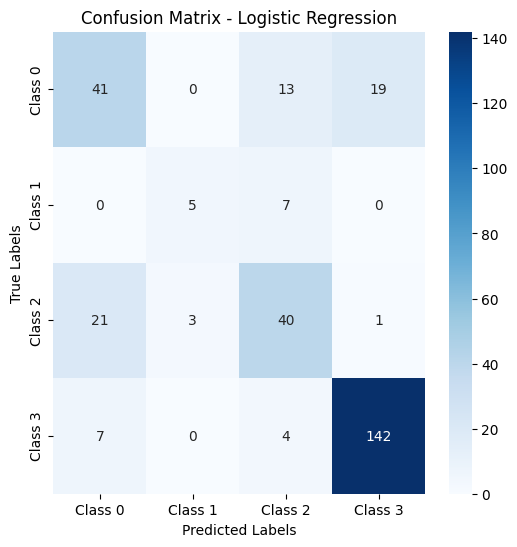

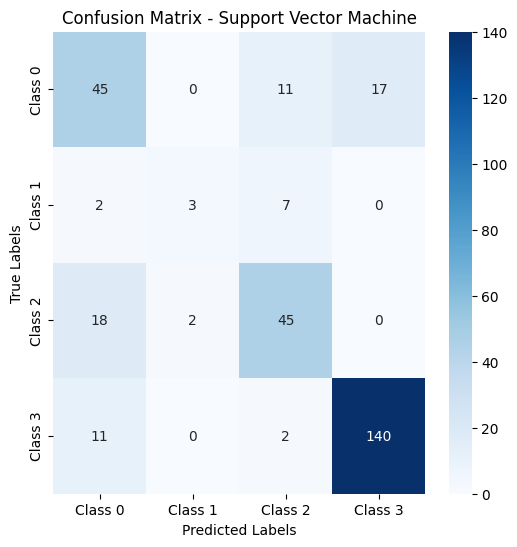

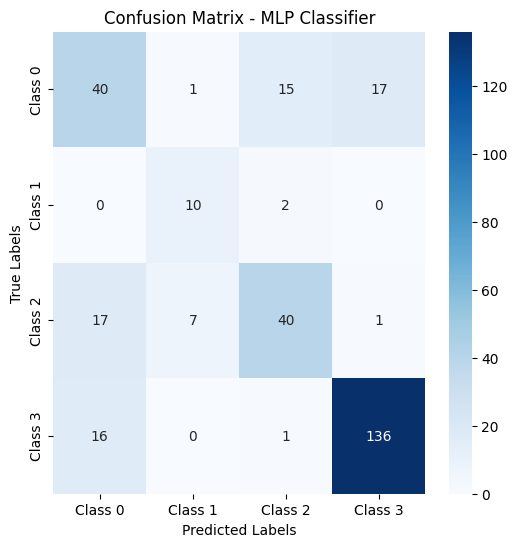

In [25]:
warnings.filterwarnings('ignore', category=UserWarning)

log_reg = LogisticRegression(solver='saga', random_state=0)
log_reg.fit(X_train_df, y_train_df)

svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_df, y_train_df)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_df, y_train_df)

log_reg_pred = log_reg.predict(X_test_df)
svm_pred = svm.predict(X_test_df)
mlp_pred = mlp.predict(X_test_df)

log_reg_accuracy = accuracy_score(y_test_df, log_reg_pred)
svm_accuracy = accuracy_score(y_test_df, svm_pred)
mlp_accuracy = accuracy_score(y_test_df, mlp_pred)

print("Logistic Regression Accuracy: ", log_reg_accuracy)
print("Support Vector Machine Accuracy: ", svm_accuracy)
print("MLP Classifier Accuracy: ", mlp_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_df, log_reg_pred))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test_df, svm_pred))

print("\nMLP Classifier Classification Report:")
print(classification_report(y_test_df, mlp_pred))


def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test_df, log_reg_pred, "Logistic Regression")
plot_confusion_matrix(y_test_df, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y_test_df, mlp_pred, "MLP Classifier")


4. Hyperparameter Tuning

In [26]:
warnings.filterwarnings('ignore', category=UserWarning)

param_grid_log_reg_svm = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}

param_grid_mlp = {'hidden_layer_sizes': [(128,), (64, 64), (128, 64), (128, 64, 32)]}

log_reg = LogisticRegression(solver='saga', random_state=0)
svm = SVC(kernel='rbf', random_state=0)

grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg_svm, cv=10, scoring='accuracy')
grid_search_svm = GridSearchCV(svm, param_grid_log_reg_svm, cv=10, scoring='accuracy')

y_train_1d = y_train_df.values.ravel()
y_test_1d = y_test_df.values.ravel()

grid_search_log_reg.fit(X_train_df, y_train_1d)
grid_search_svm.fit(X_train_df, y_train_1d)

mlp = MLPClassifier(random_state=0)

grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')

grid_search_mlp.fit(X_train_df, y_train_1d)


print("Best parameters for Logistic Regression: ", grid_search_log_reg.best_params_)
print("Best cross-validation accuracy for Logistic Regression: ", grid_search_log_reg.best_score_)

print("Best parameters for SVM: ", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM: ", grid_search_svm.best_score_)

print("Best parameters for MLP: ", grid_search_mlp.best_params_)
print("Best cross-validation accuracy for MLP: ", grid_search_mlp.best_score_)


best_log_reg = grid_search_log_reg.best_estimator_
log_reg_pred = best_log_reg.predict(X_test_df)
log_reg_accuracy = accuracy_score(y_test_1d, log_reg_pred)
print("Logistic Regression Test Accuracy: ", log_reg_accuracy)

best_svm = grid_search_svm.best_estimator_
svm_pred = best_svm.predict(X_test_df)
svm_accuracy = accuracy_score(y_test_1d, svm_pred)
print("SVM Test Accuracy: ", svm_accuracy)

best_mlp = grid_search_mlp.best_estimator_
mlp_pred = best_mlp.predict(X_test_df)
mlp_accuracy = accuracy_score(y_test_1d, mlp_pred)
print("MLP Test Accuracy: ", mlp_accuracy)


Best parameters for Logistic Regression:  {'C': 1}
Best cross-validation accuracy for Logistic Regression:  0.7663782696177062
Best parameters for SVM:  {'C': 20}
Best cross-validation accuracy for SVM:  0.8145271629778671
Best parameters for MLP:  {'hidden_layer_sizes': (128, 64, 32)}
Best cross-validation accuracy for MLP:  0.8088003196483868
Logistic Regression Test Accuracy:  0.7524752475247525
SVM Test Accuracy:  0.7755775577557755
MLP Test Accuracy:  0.768976897689769


5. Model Retraining and Second Evaluation

Logistic Regression - Test Accuracy: 0.7524752475247525
SVM - Test Accuracy: 0.7755775577557755
MLP - Test Accuracy: 0.768976897689769
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.58        73
           1       0.62      0.42      0.50        12
           2       0.62      0.62      0.62        65
           3       0.88      0.93      0.90       153

    accuracy                           0.75       303
   macro avg       0.68      0.63      0.65       303
weighted avg       0.74      0.75      0.75       303

SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64        73
           1       0.45      0.75      0.56        12
           2       0.75      0.60      0.67        65
           3       0.90      0.91      0.91       153

    accuracy                           0.78       303
   macro avg       0.68     

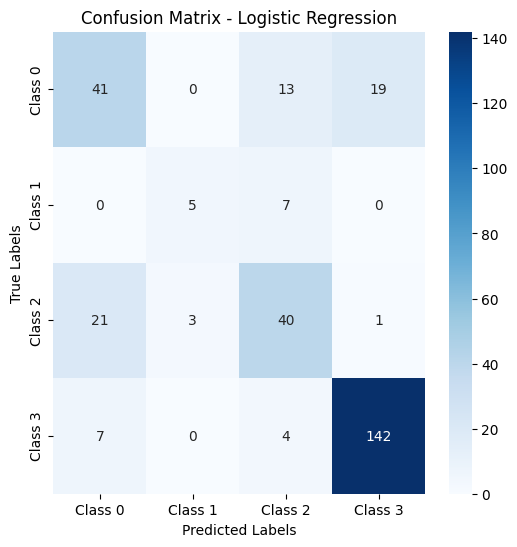

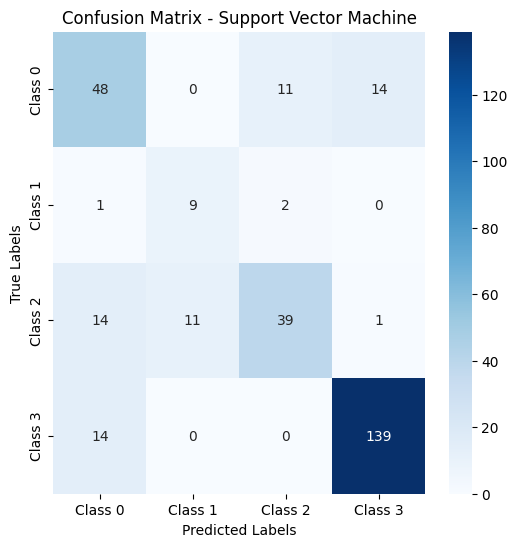

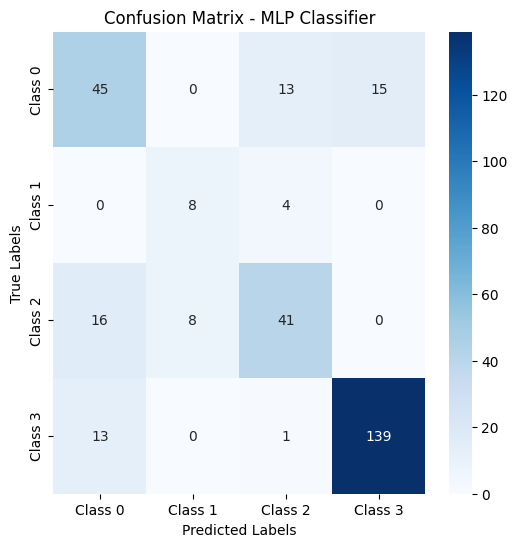

In [33]:
warnings.filterwarnings('ignore', category=UserWarning)

best_log_reg = LogisticRegression(solver='saga', C=grid_search_log_reg.best_params_['C'], random_state=0)
best_log_reg.fit(X_train_df, y_train_df)

best_svm = SVC(kernel='rbf', C=grid_search_svm.best_params_['C'], random_state=0)
best_svm.fit(X_train_df, y_train_df)

best_mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], random_state=0)
best_mlp.fit(X_train_df, y_train_df)

log_reg_pred = best_log_reg.predict(X_test_df)
log_reg_accuracy = accuracy_score(y_test_df, log_reg_pred)
log_reg_class_report = classification_report(y_test_df, log_reg_pred)

svm_pred = best_svm.predict(X_test_df)
svm_accuracy = accuracy_score(y_test_df, svm_pred)
svm_class_report = classification_report(y_test_df, svm_pred)

mlp_pred = best_mlp.predict(X_test_df)
mlp_accuracy = accuracy_score(y_test_df, mlp_pred)
mlp_class_report = classification_report(y_test_df, mlp_pred)

print("Logistic Regression - Test Accuracy:", log_reg_accuracy)
print("SVM - Test Accuracy:", svm_accuracy)
print("MLP - Test Accuracy:", mlp_accuracy)

print("Logistic Regression - Classification Report:\n", log_reg_class_report)
print("SVM - Classification Report:\n", svm_class_report)
print("MLP - Classification Report:\n", mlp_class_report)

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test_df, log_reg_pred, "Logistic Regression")
plot_confusion_matrix(y_test_df, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y_test_df, mlp_pred, "MLP Classifier")


Step 6 Analysis and Discussion

Performance Comparison Analysis
----
Before Hyperparameter Tuning

Logistic Regression: 75.25%

SVM: 76.90%

MLP: 74.59%

After Hyperparameter Tuning
----
Logistic Regression: 75.25% (unchanged)

SVM: 77.56% (improved by 0.66%)

MLP: 76.90% (improved by 2.31%)

Model Performance Analysis
----
Best Performing Model

SVM consistently performed the best, both before and after tuning

The improvements from hyperparameter tuning were minimal, suggesting the models were already well-configured for the dataset

Class-wise Performance
----
Class 3 shows the highest performance across all models (88-90% precision)

Class 1 shows the most inconsistent performance across models

Classes 0 and 2 show moderate performance (55-75% range)

Possible Reason
----
1. Class Imbalance

    Class 3 has 153 samples

    Class 1 has only 12 samples

    This significant imbalance affects model learning

2. Feature Representation

    Classes 0 and 1 might have overlapping features

    The models struggle to find clear decision boundaries for these classes

3. Data Quality

    The small sample size for Class 1 might not capture all possible variations

    Features might not be discriminative enough for certain classes